In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('haberman.csv')
display(data.head())

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Objective** : To classify a new datapoint into one of the two categories of classification label 'status' by analyzing the features and their values using visual analysis techniques.

Status = 1  signifies that the patient survived 5 years and longer. 
<br>
Status = 2 signifies that the patient died within 5 years of treatment.

**Features**:

Age: age of patient at the time of operation
<br>
Year: The year of operation<br>
Nodes : Number of positive axillary nodes detected


# High-Level Statistics

In [3]:
print data.shape
print data.columns
print np.unique(data['status'])
print data['status'].value_counts()


(306, 4)
Index([u'age', u'year', u'nodes', u'status'], dtype='object')
[1 2]
1    225
2     81
Name: status, dtype: int64


**Observation**:
From the above statistical analysis, we can make the following observations:
<br>1) Number of data points = 306
<br>2) Number of features = 3 (4 columns including 1 classifaction label column)
<br>3) Number of classes  = 2 (status=1, status=2)
<br>4) Datapoints per class: status = 1: 225, status = 2: 81

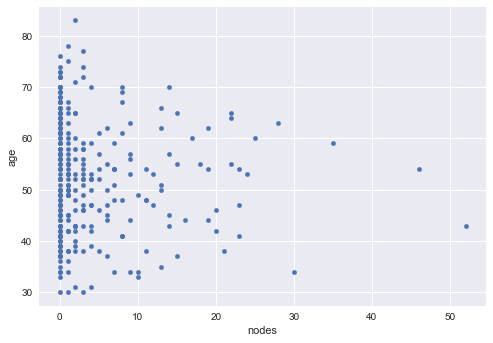

In [4]:
data.plot(kind='scatter', x='nodes', y='age')
plt.show()

**Observation:**
All of the data points in the scatter plot are of same colour. Hence, the scatter plot does not seem to make any sense.


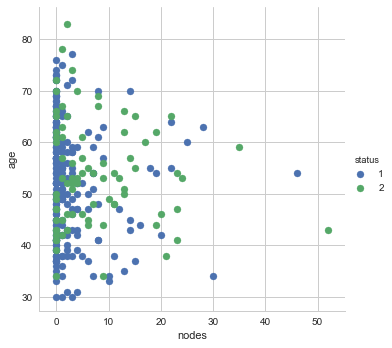

In [5]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "status", size = 5) \
    .map(plt.scatter, "nodes", "age") \
    .add_legend();
plt.show();

**Observation**: Here, the class labels can be easily observed. However, the above plot shows that the data points cannot be separated linearly and therefore linear classification is difficult by the look of this plot.

# Pair-plot

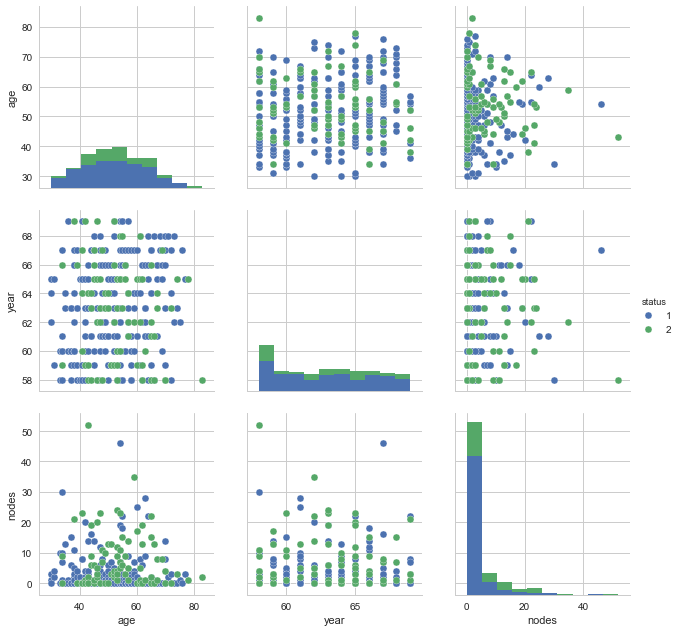

In [29]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data, hue = "status", vars = ['age','year','nodes'], size =3);
plt.show()

**Observation**:
'Year' and 'nodes' seem to be the best choice of features for classification as of now. However, these features cannot linearly separate the data points as belonging to a class label.
A lot of points are overlapping.

# 1-D scatter plot

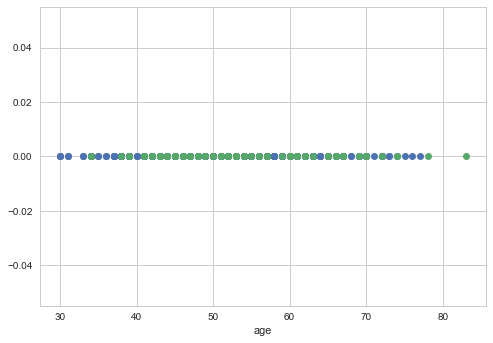

In [91]:
data_status1 = data.loc[data["status"] == 1]
data_status2 = data.loc[data["status"] == 2]

plt.plot(data_status1["age"], np.zeros_like(data_status1['age']),'o')
plt.plot(data_status2["age"], np.zeros_like(data_status2['age']),'o')
plt.xlabel('age')



plt.show()

**Observation**: The above 1-d scatter plot is plotted to observe the classification of datapoints based on just one feature[here 'age']. As we can see, the classification of the above data points is not clear and many of the data points are overlapping. 

# Pair-plots

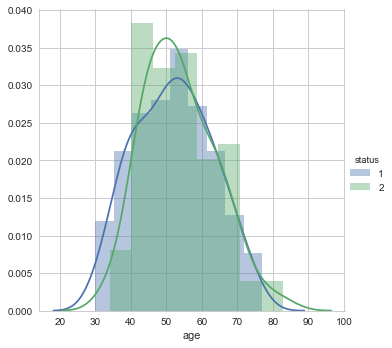

In [94]:
sns.FacetGrid(data, hue="status", size=5) \
    .map(sns.distplot, "age") \
    .add_legend()
plt.show()

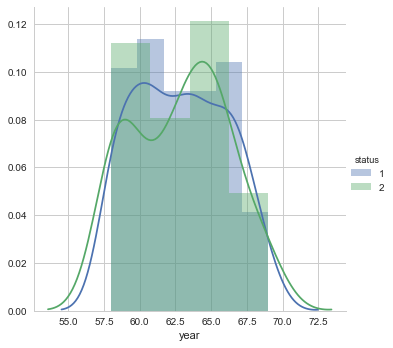

In [32]:
sns.FacetGrid(data, hue="status", size=5) \
    .map(sns.distplot, "year") \
    .add_legend()
plt.show()

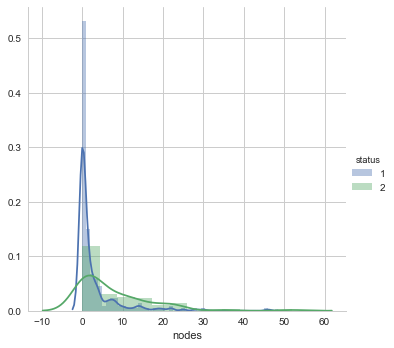

In [35]:
sns.FacetGrid(data, hue="status", size=5) \
    .map(sns.distplot, "nodes") \
    .add_legend()
plt.show()

**Observation**:From the above 3 plots, it can be observed that nodes is the only feature which shows better classification using PDF than any other features. However, the PDFs of the two class labels are still overlapping.

# Histogram, PDF, CDF

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


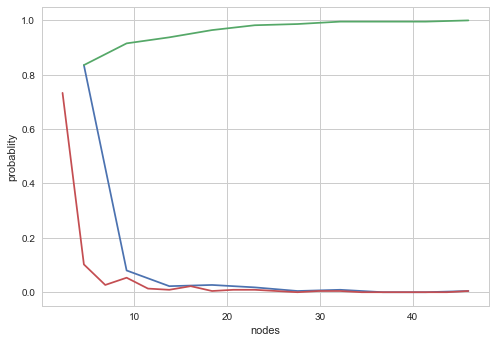

In [95]:
counts, bin_edges = np.histogram(data_status1['nodes'], bins=10, density= True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.ylabel('probablity')
counts, bin_edges = np.histogram(data_status1['nodes'], bins = 20, density =True)

pdf = counts/(sum(counts))
plt.plot(bin_edges[1:], pdf)

plt.show()

**Observation**: From the above plot of PDF and CDF, it is clear that ~90% of data points have 'nodes' value less than 10 which give the 'status' classification label 1. Also, all the datapoints having classification label as 1 have 'nodes' value less than 50. From the PDF plot, it can be observed that the datapoints with nodes value around 5 have highest frequency. This observations are essential.

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


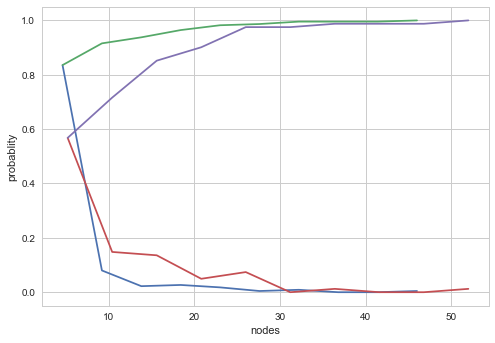

In [97]:
counts, bin_edges = np.histogram(data_status1['nodes'], bins=10, density= True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.ylabel('probablity')

counts, bin_edges = np.histogram(data_status2['nodes'], bins=10, density= True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


plt.show()

**Observation**: 70% of datapoints having 'status' = 2 have nodes value less than 10. Also, 90% of datapoints having 'status' = 1 have nodes value less than 10. This gives us the insight that more than half of the data points of either class labels have nodes value less than 10. However, the plots do not show any remarkable classification and hence it is very difficult to write simple conditions for classifying the data points.

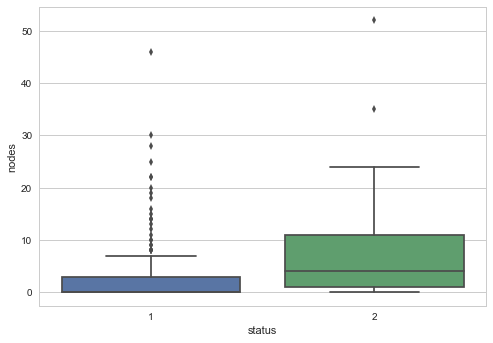

In [54]:
sns.boxplot(x='status', y='nodes', data = data)
plt.show()

**Observation**: 
<br>Till now, Box-plots have come to be the easiest way to visualize classification. 
<br>There are a lot of outliers for 'status' = 1 label. These outliers can be removed from the dataset for better classification before feeding the data to an algorithm.
<br>For status = 1, all 'nodes' value lie below 8. For status = 2, all 'nodes' value lie below 25.
<br>However, 50 percentile of data points have nodes value =  0.(for status = 1) 
<br>For status = 2, 25th percentile value is 1, 50th percentile value is 4, 75th percentile value is 11.
<br>
If a simple if-else condition can be written, the only true condition for correct classification would be: all 'nodes' value greater than 8 belong to the class label 'status'=2.


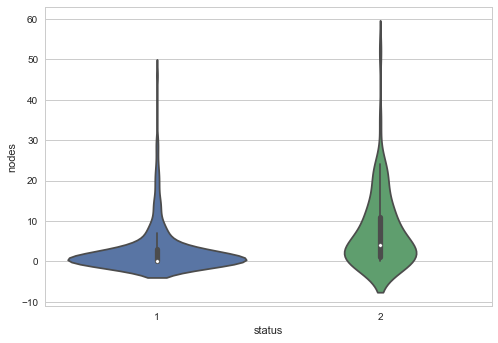

In [55]:
sns.violinplot(x = "status", y = "nodes", data = data, size = 5)
plt.show()

**Observation**: The above violin plot shows that the most of the data points lie between the value of 0 and 10 for status = 1. For status = 2, most data points lie between values 1 and 30. Most of the data points for 'status' = 1 label have 'nodes' values around 0 with highest frequency and for status = 2 label have 'nodes' values around 2 having highest frequency.

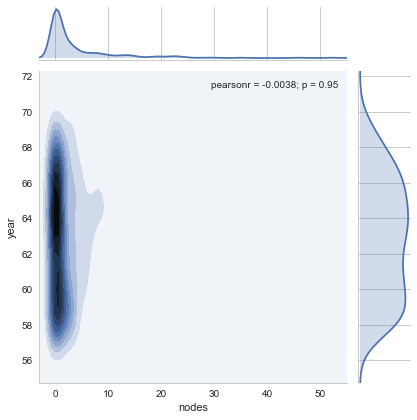

In [68]:
sns.jointplot(x="nodes", y="year", data=data, kind="kde");
plt.show();

**Observation**: The above contour plot shows that most data points are denser in the region where 'nodes' value = 0 and 'year' = 63(1963). The correlation between the features is -0.0038 which means the features are highly uncorrelated.

**Summary**:

By doing the above analysis using different visualization techniques, it is clear that the datapoints are highly overlapping and cannot be separated linearly. Box-plots and violin plots were found to be the best tools to analyze the datapoints and provide a much better choice for writing simple if else conditions.